In [12]:
import os
import sys
import pickle
import re

import numpy as np
import scipy
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib

sys.path.append("/home/axel/mercury_orbit")
sys.path.append("/home/axel/mercury_orbit/integrators_objects/")
from integrators.back_euler import BackEuler
from integrators.rk4 import Rk4Integrator
from integrators.euler_forward import EulerForward

from scipy.signal import find_peaks
from scipy.stats import linregress

In [131]:
def generate_figure_loc(ax, fig, name):
    ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax.grid()
    #ax.legend()

    ax.set_xlabel("$dt$")
    #ax.set_ylabel("System energy trend slope")

    ax.ticklabel_format(style='sci')
    ax.set_xticks([0.01, 0.05, 0.1])
    
    ax.set_xlabel(r"$dt$")
    #ax.set_ylabel(r"System energy trend slope")
    fig.tight_layout()
    # ax.set_xticks(np.arange(0, 0.11, 0.025))
    #plt.show()
    
    fig.savefig("report/"+name, dpi=2000)

## System setup

In [7]:
t_start = 0
t_end = 3000

M = 1
r = 9
#v = 0.345

#v = np.sqrt(M / r) + 0.01 * M / r
v = 0.375#np.sqrt(M / r) + 0.001 * M / r
initial_conditions = np.array([r, 0.0, 0, v / r])

dt_array = [0.5, 0.3, 0.1, 0.08, 0.05, 0.01]


In [8]:
# PLotting parameters
# plt.rcParams['text.usetex'] = True

plt.rcParams["font.size"] = 24

plt.rcParams['xtick.major.size'] = 5.0
plt.rcParams['xtick.minor.size'] = 3.0
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Euler method

In [9]:
#plt.plot(t_array, r_array)
#ax.plot(euler_f_x_array, euler_f_y_array, "-", label="Euler forward")
#ax.plot(euler_x_array, euler_y_array, "--", label="Back Euler")
#ax.plot(rk4_x_array, rk4_y_array, "--", label="Rk4")

euler_integrators = {}

for dt in dt_array:#, 0.001]:
    print(dt)
    euler_forward_integrator = EulerForward(initial_conditions, dt, t_end, t_start, M)
    euler_forward_integrator.run_simulation()
    euler_integrators[str(dt)] = euler_forward_integrator
    t_array = np.append(euler_forward_integrator.t_array, t_end)
    # ax.plot(t_array, euler_forward_integrator.get_system_energy(), "-", label="Euler forward")


0.5
0.3
0.1
0.08
0.05
0.01


In [42]:
def save_integrators(integrators: dict, base_name: str, save_dir: str):
    for dt, integrator in euler_integrators.items():
        with open("{0}/{1}_{2}".format(save_dir, base_name, dt), "wb") as f:
            pickle.dump(integrator, f)
            

def get_saved_integrators(save_dir, base_name):
    for file_name in os.listdir():
        if re.findall(base_name, file_name):
            pass

In [19]:
loaded_integrators = {}

path = "../integrators_objects/0375_precession_study"

for file_name in os.listdir(path):
    if re.findall("rk4", file_name):
        dt = re.findall("\d+\.\d+", file_name)[0]
        with open("{0}/{1}".format(path, file_name), "rb") as f:
            e = pickle.load(f)
            print(dt)
            loaded_integrators[str(dt)] = e
            

0.01
0.3
0.5
0.1
0.08
0.05


dict_keys(['0.01', '0.3', '0.5', '0.1', '0.08', '0.05'])


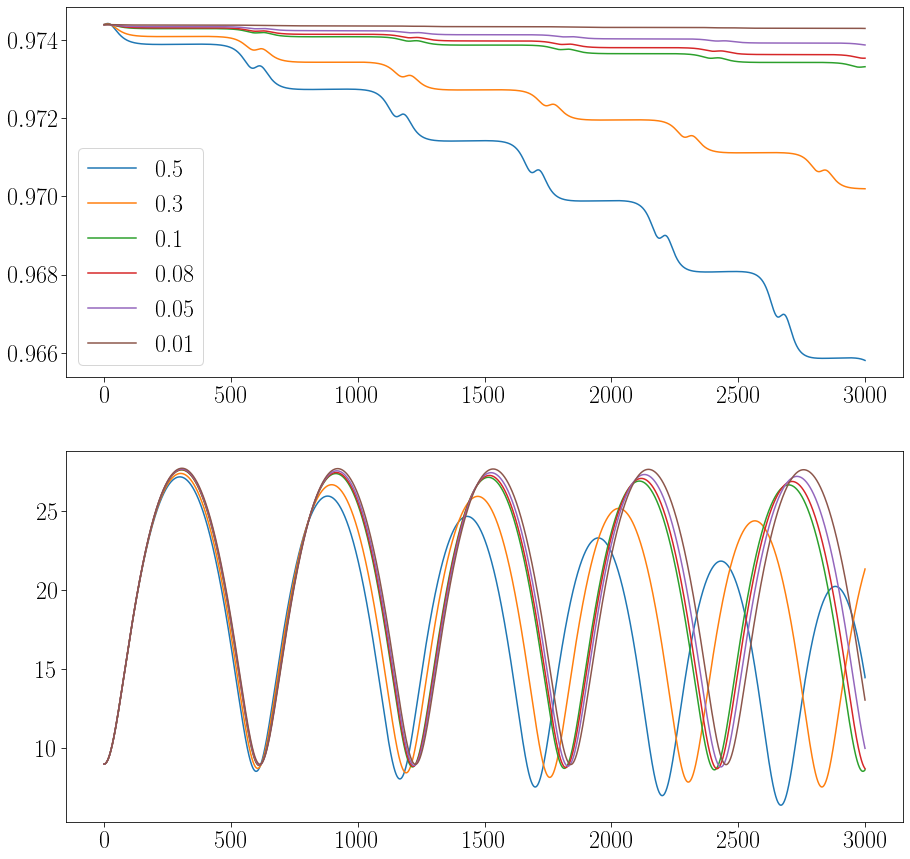

In [114]:
fig, axs = plt.subplots(2,1, figsize=(15,15))

for dt, integrator in euler_integrators.items():
    # if dt == "0.1":
    #     continue
    #axs[0].plot(np.append(integrator.t_array, t_end), integrator.get_system_energy(), label=dt)
    axs[0].plot(integrator.t_array, integrator.get_system_energy()[:-1], label=dt)
    #axs[0].plot(np.append(integrator.t_array, t_end), integrator.obs[:,2], label=dt)
    axs[1].plot(np.append(integrator.t_array, t_end), integrator.obs[:,0], label=dt)
    #axs[1].plot(integrator.obs[:,0]*np.cos(integrator.obs[:,2]), integrator.obs[:,0]*np.sin(integrator.obs[:,2]), label=dt)
# ax.plot(t_array, f)

axs[0].legend()

LinregressResult(slope=0.43709876268480496, intercept=0.6725066154420279, rvalue=0.9920304045972604, pvalue=9.501858408716748e-05, stderr=0.02775816268893119)


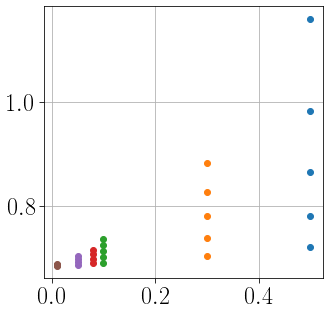

In [115]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

dts = [float(key) for key in euler_integrators.keys()]
change_avgs = []

# finding the perihelions
for dt, integrator in euler_integrators.items():
    # Finding valleys/perihelions
    peri_ind, _ = find_peaks(-integrator.obs[:,0])
    peri_ind = np.insert(peri_ind, 0, 0)
    # print(dt, integrator.obs[peri_ind, 2]/(2 * np.pi))
    change = np.diff(integrator.obs[peri_ind, 2])/np.pi - 2
    change_avg = np.mean(change)
    change_avgs.append(change_avg)
    ax.scatter([float(dt)]*len(change), change)

result = linregress(dts, change_avgs)

print(result)

ax.grid()



dt =   0.5: a:  0.560221218175569  , b: -3.4318863032568445
dt =   0.3: a: 0.46404376037153333 , b: -3.7562935893531133
dt =   0.1: a:  0.3011499010822716 , b: -4.176399052138762
dt =  0.08: a:  0.3010806826030078 , b: -4.293065755561614
dt =  0.05: a:  0.2375770180864889 , b: -4.361858889126574
dt =  0.01: a: 0.06773472671085613 , b: -4.365830535937782


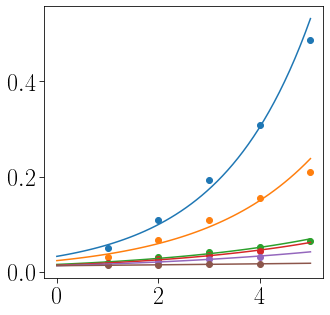

In [158]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
for dt in dt_array:
    integrator = euler_integrators[str(dt)]
    peri_ind, _ = find_peaks(-integrator.obs[:,0])
    peri_ind = np.insert(peri_ind, 0, 0)
    # print(dt, integrator.obs[peri_ind, 2]/(2 * np.pi))
    change = np.diff(integrator.obs[peri_ind, 2])/np.pi - 2
    num_orbits = range(1, len(change)+1)

    converged_precession = 0.6725

    a, b = np.polyfit(num_orbits, np.log(change - converged_precession), 1)
    print("dt = {:5}: a: {:^20}, b: {:10}".format(dt, a, b))
    x_range = np.linspace(0, 5)

    ax.scatter(num_orbits, change - converged_precession)
    ax.plot(x_range, np.exp(b) * np.exp(a*x_range))

$dt = 0.5$:
$err = e^{-3.431 +  0.56}$


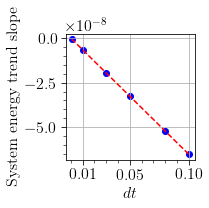

In [124]:
## INvestigating slope dependence
fig, ax = plt.subplots(1,1, figsize=(3,3))

dts = []
ks = []

for dt_str, integrator in integrators.items():
    dt = float(dt_str)
    reg_result = stats.linregress(np.append(integrator.t_array, t_end), integrator.get_system_energy())
    ax.scatter(dt, reg_result.slope, label=dt, c="blue")
    
    dts.append(dt)
    ks.append(reg_result.slope)
    
#reg_result = stats.linregress(dts, ks)

ax.plot([dts[0], dts[-1]], [ks[0], ks[-1]], "--r")

#ax.grid()

generate_figure_loc(ax, fig, "figures/energy_conservation_euler_method.png")
    

# ax.legend()

# fig.savefig("report/figures/energy_conservation_euler_method.png", dpi=1000)

## RK4

In [12]:
rk4_integrators = {}

#for dt in [0.1, 0.08, 0.05, 0.03, 0.01, 0.001]:
#for dt in [0.1, 0.08, 0.05, 0.045, 0.04, 0.035, 0.03, 0.025, 0.02, 0.015, 0.01, 0.008, 0.005, 0.003, 0.001]:
for dt in dt_array:
    print(dt)    
    rk4_integrator = Rk4Integrator(initial_conditions, dt, t_end, t_start, M)
    rk4_integrator.run_simulation()
    rk4_integrators[str(dt)] = rk4_integrator
    t_array = np.append(rk4_integrator.t_array, t_end)
    # ax.plot(t_array, euler_forward_integrator.get_system_energy(), "-", label="Euler forward")

0.5
0.3
0.1
0.08
0.05
0.01


['0.01']

In [43]:
save_dir = "integrators_objects/0375_precession_study/"
base_name = "rk4"
save_integrators(rk4_integrators, base_name, save_dir)

In [22]:
rk4_integrators = loaded_integrators

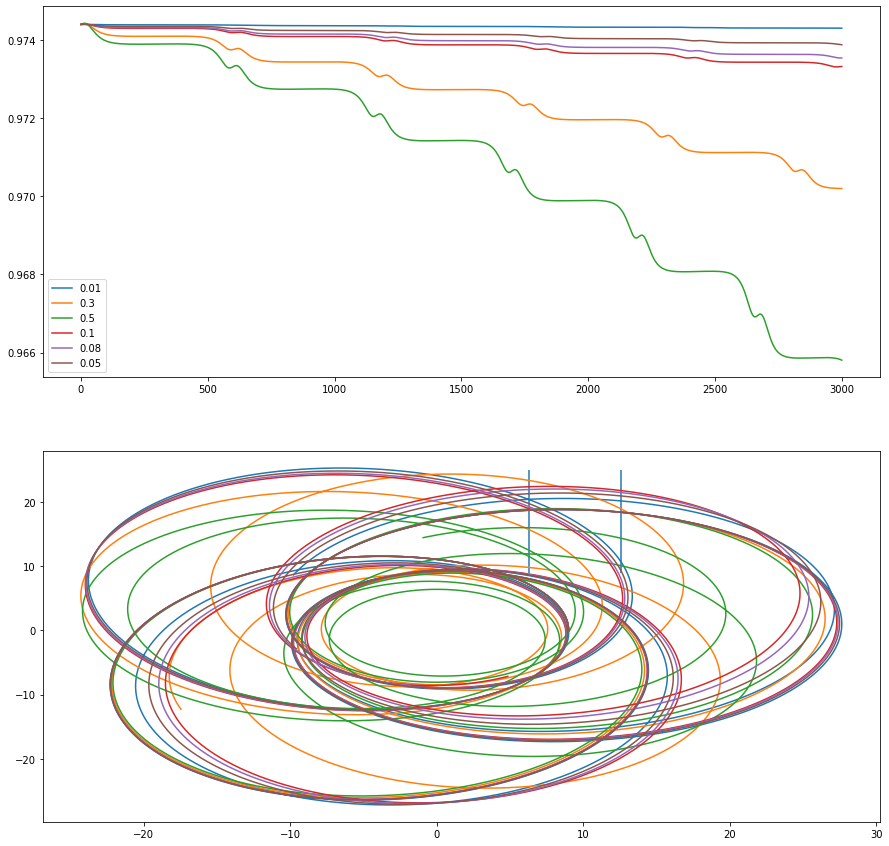

In [23]:
fig, axs = plt.subplots(2,1, figsize=(15,15))

for dt, integrator in rk4_integrators.items():
    #axs[0].plot(np.append(integrator.t_array, t_end), integrator.get_system_energy(), label=dt)
    axs[0].plot(integrator.t_array, integrator.get_system_energy()[:-1], label=dt)
    #axs[0].plot(np.append(integrator.t_array, t_end), integrator.obs[:,2], label=dt)
    
    #axs[1].plot(np.append(integrator.t_array, t_end), integrator.obs[:,0], label=dt)
    #axs[1].plot(integrator.obs[:,2], integrator.obs[:,0], label=dt)
    axs[1].plot(integrator.obs[:,0]*np.cos(integrator.obs[:,2]), integrator.obs[:,0]*np.sin(integrator.obs[:,2]), label=dt)

# Add 2pi lines
axs[1].vlines([2*np.pi, 4*np.pi], 9, 25)

axs[0].legend()

LinregressResult(slope=0.43709876268480485, intercept=0.6725066154420279, rvalue=0.9920304045972603, pvalue=9.50185840871702e-05, stderr=0.02775816268893138)


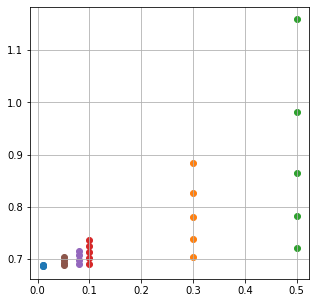

In [24]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

dts = [float(key) for key in rk4_integrators.keys()]
change_avgs = []

# finding the perihelions
for dt, integrator in rk4_integrators.items():
    # Finding valleys/perihelions
    peri_ind, _ = find_peaks(-integrator.obs[:,0])
    peri_ind = np.insert(peri_ind, 0, 0)
    # print(dt, integrator.obs[peri_ind, 2]/(2 * np.pi))
    change = np.diff(integrator.obs[peri_ind, 2])/np.pi - 2  # Expressed in pi
    change_avg = np.mean(change)
    change_avgs.append(change_avg)
    ax.scatter([float(dt)]*len(change), change)

result = linregress(dts, change_avgs)

print(result)

ax.grid()

NameError: name 'dt_array' is not defined

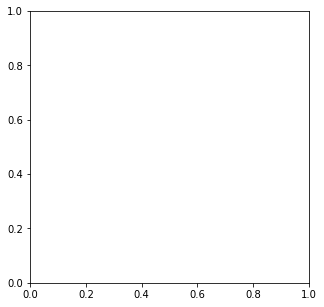

In [25]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
for dt in dt_array:
    integrator = rk4_integrators[str(dt)]
    peri_ind, _ = find_peaks(-integrator.obs[:,0])
    peri_ind = np.insert(peri_ind, 0, 0)
    # print(dt, integrator.obs[peri_ind, 2]/(2 * np.pi))
    change = np.diff(integrator.obs[peri_ind, 2])/np.pi - 2
    num_orbits = range(1, len(change)+1)

    converged_precession = 0.6725

    a, b = np.polyfit(num_orbits, np.log(change - converged_precession), 1)
    print("dt = {:5}: a: {:^20}, b: {:10}".format(dt, a, b))
    x_range = np.linspace(0, 5)

    ax.scatter(num_orbits, change - converged_precession)
    ax.plot(x_range, np.exp(b) * np.exp(a*x_range))

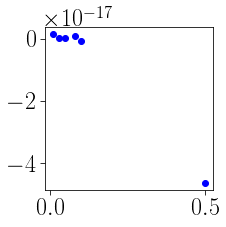

In [104]:
## INvestigating slope dependence
fig, ax = plt.subplots(1,1, figsize=(3,3))

dts = []
ks = []

for dt_str, integrator in rk4_integrators.items():
    dt = float(dt_str)
    reg_result = stats.linregress(np.append(integrator.t_array, t_end), integrator.get_system_energy())
    ax.scatter(dt, reg_result.slope, label=dt, c="blue")
    
    dts.append(dt)
    ks.append(reg_result.slope)


#generate_figure_loc(ax, fig, "figures/energy_conservation_rk4.png")

# ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
# ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
# ax.grid()
# #ax.legend()

# ax.set_xlabel("$dt$")
# ax.set_ylabel("System energy trend slope")

# ax.ticklabel_format(style='sci')

# # ax.set_xticks(np.arange(0, 0.11, 0.025))

# plt.show()

# fig.savefig("report/figures/energy_conservation_rk4.png", dpi=1000)


## Euler back

In [48]:
back_euler_integrators = {}

#for dt in [0.1, 0.08, 0.05, 0.03, 0.01, 0.001]:
#for dt in [0.05, 0.03, 0.025, 0.02, 0.015, 0.01, 0.008, 0.005, 0.003, 0.001]:
for dt in dt_array:
    print(dt)  
    back_euler_integrator = BackEuler(initial_conditions, dt, t_end, t_start, M)
    back_euler_integrator.run_simulation()
    back_euler_integrators[str(dt)] = back_euler_integrator
    t_array = np.append(back_euler_integrator.t_array, t_end)
    # ax.plot(t_array, euler_forward_integrator.get_system_energy(), "-", label="Euler forward")

0.5
0.3
0.1
0.08
0.05
0.01


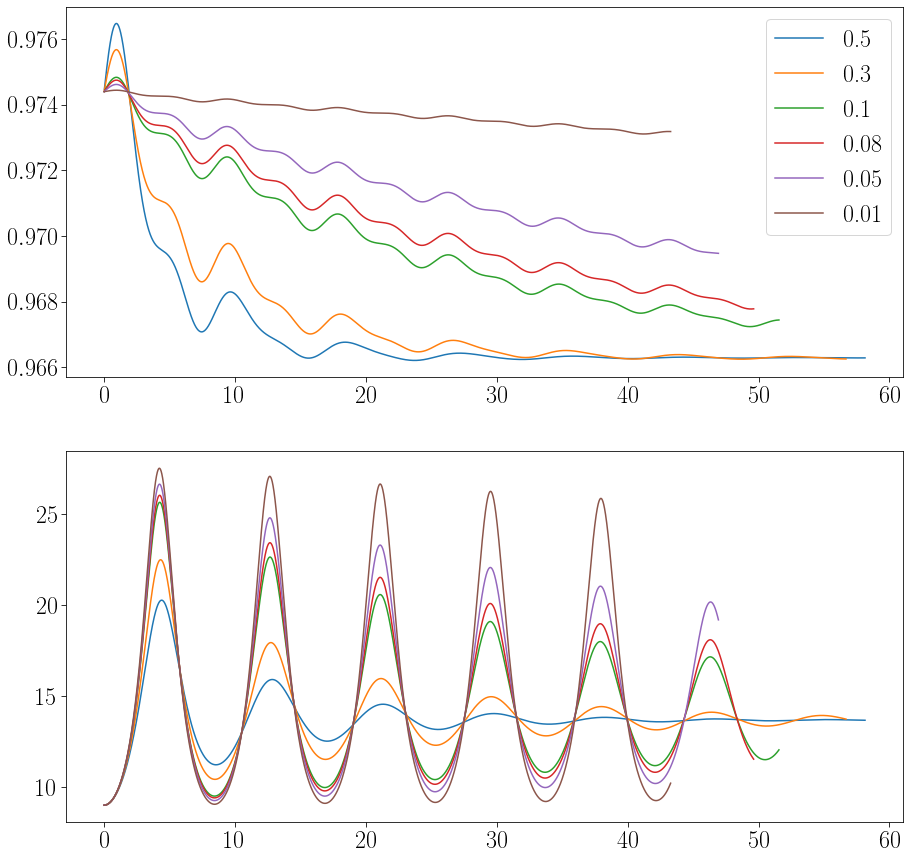

In [119]:
fig, axs = plt.subplots(2,1, figsize=(15,15))

for dt, integrator in back_euler_integrators.items():
    # if dt == "0.1":
    #     continue
    #axs[0].plot(np.append(integrator.t_array, t_end), integrator.get_system_energy(), label=dt)
    axs[0].plot(integrator.obs[:,2], integrator.get_system_energy(), label=dt)
    #axs[0].plot(np.append(integrator.t_array, t_end), integrator.obs[:,2], label=dt)
    axs[1].plot( integrator.obs[:,2], integrator.obs[:,0], label=dt)
    #axs[1].plot(integrator.obs[:,0]*np.cos(integrator.obs[:,2]), integrator.obs[:,0]*np.sin(integrator.obs[:,2]), label=dt)
# ax.plot(t_array, f)

axs[0].legend()

LinregressResult(slope=0.037517114289853284, intercept=0.6782814986427781, rvalue=0.8578663311074316, pvalue=0.028867278993024204, stderr=0.011236615567308367)


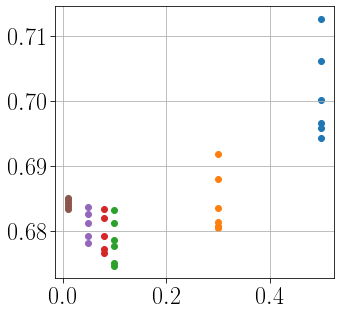

In [175]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

dts = [float(key) for key in euler_back_integrators.keys()]
change_avgs = []

# finding the perihelions
for dt, integrator in euler_back_integrators.items():
    # Finding valleys/perihelions
    peri_ind, _ = find_peaks(-integrator.obs[:,0])
    peri_ind = np.insert(peri_ind, 0, 0)
    # print(dt, integrator.obs[peri_ind, 2]/(2 * np.pi))
    change = np.diff(integrator.obs[peri_ind, 2]/(np.pi)) - 2
    change_avg = np.mean(change)
    change_avgs.append(change_avg)
    ax.scatter([float(dt)]*len(change), change)

result = linregress(dts, change_avgs)

print(result)

ax.grid()

dt =   0.5: a: -0.11293473908576494, b: -3.188766223898284
dt =   0.3: a: -0.17337203093585432, b: -3.8893751666801952
dt =   0.1: a: -0.3309117471126821 , b: -4.12708661349926
dt =  0.08: a: -0.2611923876585606 , b: -4.218659714065649
dt =  0.05: a: -0.17672924127889175, b: -4.2664548830257
dt =  0.01: a: -0.03536640512322823, b: -4.336431201875618


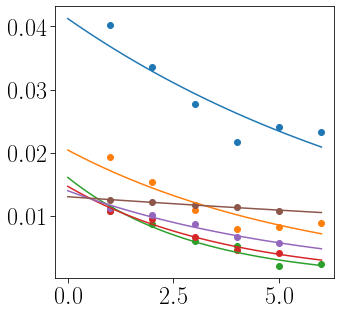

In [163]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
for dt in dt_array:
    integrator = euler_back_integrators[str(dt)]
    peri_ind, _ = find_peaks(-integrator.obs[:,0])
    peri_ind = np.insert(peri_ind, 0, 0)
    # print(dt, integrator.obs[peri_ind, 2]/(2 * np.pi))
    change = np.diff(integrator.obs[peri_ind, 2])/np.pi - 2
    num_orbits = range(1, len(change)+1)

    converged_precession = 0.6725

    a, b = np.polyfit(num_orbits, np.log(change - converged_precession), 1)
    print("dt = {:5}: a: {:^20}, b: {:10}".format(dt, a, b))
    x_range = np.linspace(0, 6)

    ax.scatter(num_orbits, change - converged_precession)
    ax.plot(x_range, np.exp(b) * np.exp(a*x_range))

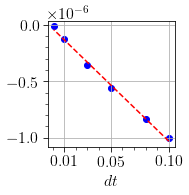

In [134]:
## INvestigating slope dependence
fig, ax = plt.subplots(1,1, figsize=(3,3))

dts = []
ks = []
ms = []

for dt_str, integrator in euler_back_integrators.items():
    dt = float(dt_str)
    reg_result = stats.linregress(np.append(integrator.t_array, t_end), integrator.get_system_energy())
    ax.scatter(dt, reg_result.slope, label=dt, c="blue")
    
    dts.append(dt)
    ks.append(reg_result.slope)
    ms.append(reg_result.intercept)
    
regreg_result = stats.linregress(dts, ks)    

ax.plot([dts[0], dts[-1]], [ks[0] + regreg_result.intercept, ks[-1] + regreg_result.intercept], "--r")

generate_figure_loc(ax, fig, "figures/energy_conservation_euler_back.png")
